In [1]:
from sim_core.car import Car
from sim_core.engine import Engine
from sim_core.aerodynamics import FrontWing
from sim_core.tire import Tire
from sim_core.compound import soft_compound
from sim_core.utils import *

def example_downforce_curve(speed, coef_low_speed=1, coef_medium_speed=1, coef_high_speed=1):
    a = (coef_high_speed * 0.09)
    b = (coef_medium_speed * 2.5)
    c = (coef_low_speed * 5)
    return max(0, a * speed * speed + b * speed + c)

def example_drag_curve(speed, coef_low_speed=1, coef_medium_speed=1, coef_high_speed=1):
    a = (coef_high_speed * 0.05)
    b = (coef_medium_speed * 0.25)
    c = (coef_low_speed * 0.25)
    return max(0, a * speed * speed + b * speed + c)

def mainplane_downforce(speed, coef_low_speed=1, coef_medium_speed=1, coef_high_speed=1):
    return example_downforce_curve(speed, coef_low_speed, coef_medium_speed, coef_high_speed) * 0.6

def mainplane_drag(speed, coef_low_speed=1, coef_medium_speed=1, coef_high_speed=1):
    return example_drag_curve(speed, coef_low_speed, coef_medium_speed, coef_high_speed) * 0.6

def flaps_downforce(speed, coef_low_speed=1, coef_medium_speed=1, coef_high_speed=1):
    return example_downforce_curve(speed, coef_low_speed, coef_medium_speed, coef_high_speed) * 0.3

def flaps_drag(speed, coef_low_speed=1, coef_medium_speed=1, coef_high_speed=1):
    return example_drag_curve(speed, coef_low_speed, coef_medium_speed, coef_high_speed) * 0.3

def endplates_downforce(speed, coef_low_speed=1, coef_medium_speed=1, coef_high_speed=1):
    return example_downforce_curve(speed, coef_low_speed, coef_medium_speed, coef_high_speed) * 0.1

def endplates_drag(speed, coef_low_speed=1, coef_medium_speed=1, coef_high_speed=1):
    return example_drag_curve(speed, coef_low_speed, coef_medium_speed, coef_high_speed) * 0.1

from sim_core.aerodynamics import AerodynamicProfile

mainplane_downforce_profile = AerodynamicProfile(mainplane_downforce)
mainplane_drag_profile = AerodynamicProfile(mainplane_drag)
flaps_downforce_profile = AerodynamicProfile(flaps_downforce)
flaps_drag_profile = AerodynamicProfile(flaps_drag)
endplates_downforce_profile = AerodynamicProfile(endplates_downforce)
endplates_drag_profile = AerodynamicProfile(endplates_drag)

In [2]:
car = Car(
    mass=700,  # kg
    radius_wheel=0.3,  # m
    engine=Engine(
        ratio_gears=[3.5, 2.5, 1.5, 1.0, 0.8],
        ratio_differential=3.5,
        torque_output=example_torque_curve,
        min_rpm=1000,
        max_rpm=10000,
        idle_rpm=2000),
    front_wing=FrontWing(
        mainplane=FrontWing.MainPlane(
            downforce=mainplane_downforce_profile,
            drag=mainplane_drag_profile,
            base_weight=5 # kg,
        ),
        flaps=FrontWing.Flaps(
            downforce=flaps_downforce_profile,
            drag=flaps_drag_profile,
            base_weight=3 # kg,
        ),
        endplates=FrontWing.EndPlates(
            downforce=endplates_downforce_profile,
            drag=endplates_drag_profile,
            drag_reduction_percent=0.2,
            tire_wear_reduction_percent=0.1,
            tire_temp_reduction_percent=0.1,
            base_weight=2 # kg,
        )
    ),
    tire=Tire(soft_compound)
)

In [3]:
from sim_core.autoTransmission import AutoTransmission

auto_transmission = AutoTransmission(car.engine, 8000, 3000)

In [4]:
import numpy as np

def sim_acceleration(car, duration_seconds, gear, throttle, tick_interval=0.1, auto_shift=None):
    car.reset()
    car.set_throttle(throttle)
    for g in range(gear):
        car.engine.upshift()
    duration = (np.arange(duration_seconds * 10) + 1) / 10
    rpm_values = []
    speed_values = []
    engin_force_values = []
    drag_force_values = []

    for i in duration:
        speed_values = np.append(speed_values, ms_to_kph(car.speed))
        rpm_values = np.append(rpm_values, car.engine._rpm)
        engin_force_values = np.append(engin_force_values, car.force_wheel())
        drag_force_values = np.append(drag_force_values, car.front_wing.get_drag(ms_to_kph(car.speed)))
        car.accelerate(tick_interval)
        if auto_shift:
            auto_shift.update()
    
    car.reset()
    return rpm_values, speed_values, engin_force_values, drag_force_values, duration

def plot_gear_perf(car, duration, gear, throttle, label, speed_ax, rpm_ax, forces_ax, auto_shift=None):
    rpm_values, speed_values, engine_force_values, drag_values, seconds = sim_acceleration(car, duration, gear, throttle, auto_shift=auto_shift)
    speed_ax.plot(seconds, speed_values, label=label)
    rpm_ax.plot(seconds, rpm_values)
    forces_ax.plot(seconds, engine_force_values, label='engine force')
    forces_ax.plot(seconds, drag_values, label='drag force')
    return speed_ax, rpm_ax, forces_ax

Grip :  1.0  Grip limitation:  700.0
net force:  5040.0
Grip limitation reached
Grip :  1.0  Grip limitation:  700.0
net force:  3884.7355664
Grip limitation reached
Grip :  1.0  Grip limitation:  700.0
net force:  3884.622990146064
Grip limitation reached
Grip :  1.0  Grip limitation:  700.0
net force:  3884.492554912915
Grip limitation reached
Grip :  1.0  Grip limitation:  700.0
net force:  3884.344262976303
Grip limitation reached
Grip :  1.0  Grip limitation:  700.0
net force:  4077.537110273614
Grip limitation reached
Grip :  1.0  Grip limitation:  700.0
net force:  4361.183908517177
Grip limitation reached
Grip :  1.0  Grip limitation:  700.0
net force:  4642.1501797589535
Grip limitation reached
Grip :  1.0  Grip limitation:  700.0
net force:  4915.804973584641
Grip limitation reached
Grip :  1.0  Grip limitation:  700.0
net force:  5176.315418768367
Grip limitation reached
Grip :  1.0  Grip limitation:  700.0
net force:  5418.0036664441795
Grip limitation reached
Grip :  1.0  

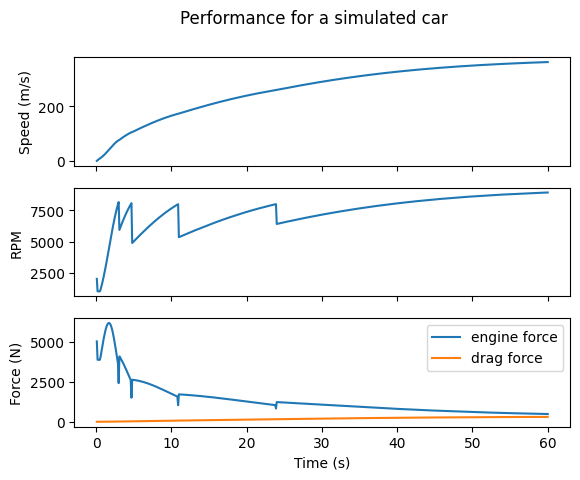

In [5]:
import matplotlib.pyplot as plt

duration = 60
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True)

ax1, ax2, ax3 = plot_gear_perf(car, duration, 0, 1, f'auto shift',ax1, ax2, ax3, auto_shift=auto_transmission)


fig.suptitle('Performance for a simulated car')

ax3.set_xlabel('Time (s)')
ax1.set_ylabel('Speed (m/s)')
ax2.set_ylabel('RPM')
ax3.set_ylabel('Force (N)')
ax3.legend()